In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
num_records = 30

student_ids = range(1, num_records + 1)
attendance_rate = np.random.uniform(low=60, high=100, size=num_records).round(2)
study_time = np.random.uniform(low=1, high=20, size=num_records).round(1)

final_exam_score = (attendance_rate * 0.5) + (study_time * 2.5) + np.random.normal(loc=0, scale=10, size=num_records)
final_exam_score = np.clip(final_exam_score, 0, 100).round(2)

pass_fail = (final_exam_score >= 60).astype(int)

data = {
    'StudentID': student_ids,
    'AttendanceRate': attendance_rate,
    'StudyTime': study_time,
    'FinalExamScore': final_exam_score,
    'Pass/Fail': pass_fail
}
df = pd.DataFrame(data)
df.to_csv('student_performance_data.csv', index=False)

print("Sample dataset created and saved to 'student_performance_data.csv'")
print(df.head())


Sample dataset created and saved to 'student_performance_data.csv'
   StudentID  AttendanceRate  StudyTime  FinalExamScore  Pass/Fail
0          1           74.98       12.5           53.95          0
1          2           98.03        4.2           52.32          0
2          3           89.28        2.2           45.53          0
3          4           83.95       19.0          100.00          1
4          5           66.24       19.3           84.81          1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       30 non-null     int64  
 1   AttendanceRate  30 non-null     float64
 2   StudyTime       30 non-null     float64
 3   FinalExamScore  30 non-null     float64
 4   Pass/Fail       30 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 1.3 KB


In [3]:
df.describe()

,StudentID,AttendanceRate,StudyTime,FinalExamScore,Pass/Fail
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,77.544000,10.433333,65.604000,0.533333
std,8.803408,11.297063,6.249653,18.199207,0.507416
min,1.000000,60.820000,1.700000,35.110000,0.000000
25%,8.250000,67.502500,4.550000,50.890000,0.000000
50%,15.500000,76.130000,10.650000,65.235000,1.000000
75%,22.750000,84.362500,16.225000,81.135000,1.000000
max,30.000000,98.800000,19.400000,100.000000,1.000000


In [5]:
df.shape

(30, 5)

In [6]:
df.size

150

In [7]:
df.isnull().sum()

,0
StudentID,0
AttendanceRate,0
StudyTime,0
FinalExamScore,0
Pass/Fail,0


In [8]:
df.columns

Index(['StudentID', 'AttendanceRate', 'StudyTime', 'FinalExamScore',
       'Pass/Fail'],
      dtype='object')

In [11]:
df.iloc[:,3]

,FinalExamScore
0,53.95
1,52.32
2,45.53
3,100.00
4,84.81
5,56.49
6,51.40
7,50.72
8,70.25
9,73.78


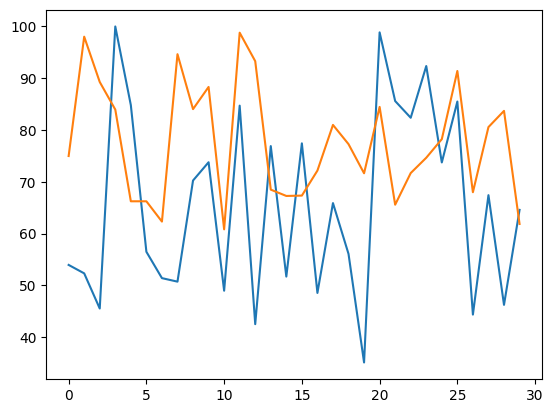

In [14]:
plt.plot(df[['FinalExamScore','AttendanceRate']])

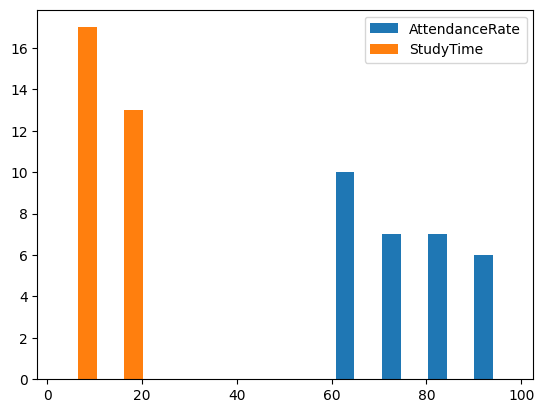

In [16]:
plt.hist(df[['AttendanceRate','StudyTime']])
plt.legend(['AttendanceRate', 'StudyTime'])

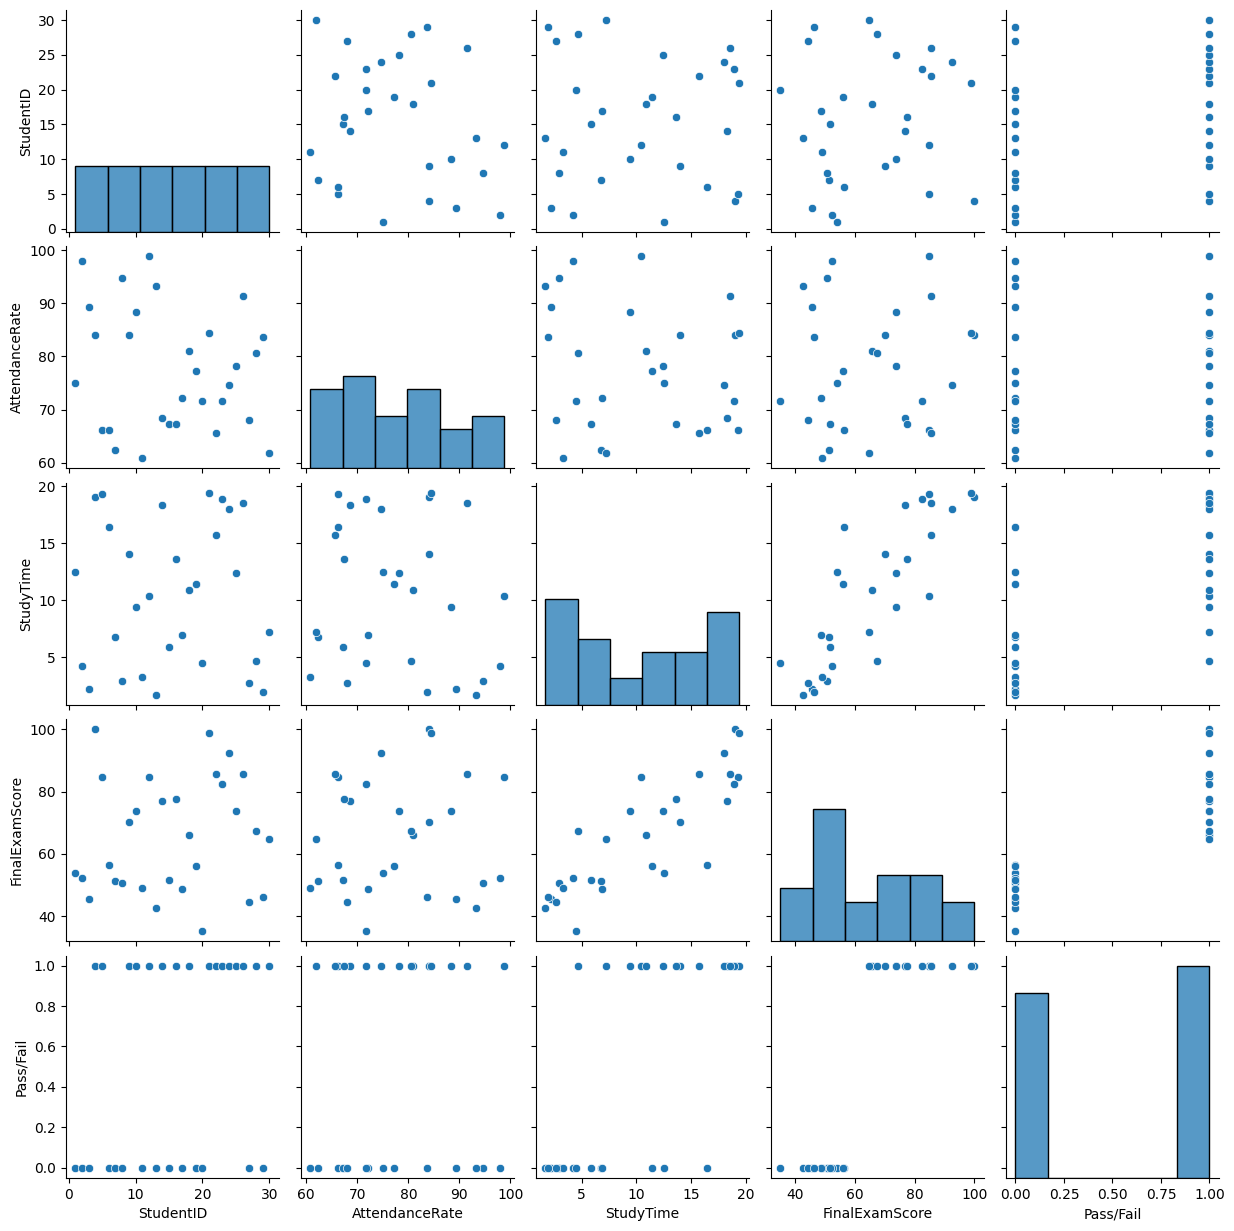

In [20]:
sns.pairplot(df)

In [22]:
a=df[['StudyTime']]
b=df['FinalExamScore']

In [23]:
print(a.shape)
print(b.shape)

(30, 1)
(30,)


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_a, test_a, train_b, test_b=train_test_split(a,b,test_size=0.2,random_state=23)

In [26]:
print(train_a.shape)
print(test_a.shape)
print(train_b.shape)
print(test_b.shape)

(24, 1)
(6, 1)
(24,)
(6,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
model_lr=LinearRegression()

In [29]:
model_lr.fit(train_a,train_b)

LinearRegression()

In [33]:
b_pred_train=model_lr.predict(train_a)
b_pred_test=model_lr.predict(test_a)

In [34]:
train_ms_lr=mean_squared_error(train_b,b_pred_train)
test_ms_lr=mean_squared_error(test_b,b_pred_test)
train_r2=r2_score(train_b,b_pred_train)
test_r2=r2_score(test_b,b_pred_test)

In [35]:
print('Train MS:',train_ms_lr)
print('Test MS:',test_ms_lr)
print('Train R2:',train_r2)
print('Test R2:',test_r2)

Train MS: 100.40239420504821
Test MS: 58.33754517698645
Train R2: 0.6515874336665352
Test R2: 0.8376435189423663


In [53]:
a=df[['AttendanceRate','StudyTime']]
b=df['Pass/Fail']
from sklearn.model_selection import train_test_split

train_a, test_a, train_b, test_b=train_test_split(a,b,test_size=0.2,random_state=24)

print(train_a.shape)
print(test_a.shape)
print(train_b.shape)
print(test_b.shape)

(24, 2)
(6, 2)
(24,)
(6,)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [58]:
model_lor=LogisticRegression(max_iter=1000)
model_lor.fit(train_a,train_b)

LogisticRegression(max_iter=1000)

In [60]:
y_pred_lor_train=model_lor.predict(train_a)
y_pred_lor_test=model_lor.predict(test_a)


In [61]:
train_accuracy_lor=accuracy_score(train_b,y_pred_lor_train)
train_precision_lor=precision_score(train_b,y_pred_lor_train)
train_recall_lor=recall_score(train_b,y_pred_lor_train)
train_f1_lor=f1_score(train_b,y_pred_lor_train)

print('Accuracy:',train_accuracy_lor)
print('Precision:',train_precision_lor)
print('Recall:',train_recall_lor)
print('F1 Score:',train_f1_lor)

Accuracy: 0.8333333333333334
Precision: 0.8125
Recall: 0.9285714285714286
F1 Score: 0.8666666666666667


In [62]:
test_accuracy_lor=accuracy_score(test_b,y_pred_lor_test)    # testing..
test_precision_lor=precision_score(test_b,y_pred_lor_test)
test_recall_lor=recall_score(test_b,y_pred_lor_test)
test_f1_lor=f1_score(test_b,y_pred_lor_test)

print('Accuracy:',test_accuracy_lor)
print('Precision:',test_precision_lor)
print('Recall:',test_recall_lor)
print('F1 Score:',test_f1_lor)

Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666


In [44]:
print(classification_report(train_b, y_pred_lor_train))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.81      0.93      0.87        14

    accuracy                           0.83        24
   macro avg       0.84      0.81      0.82        24
weighted avg       0.84      0.83      0.83        24



In [45]:
print(classification_report(test_b, y_pred_lor_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [47]:
k=3
model_KMeans = KMeans(n_clusters=k, random_state=38)

In [48]:
columns_for_clustering = ['AttendanceRate','StudyTime']
df_for_clustering = df[columns_for_clustering]
model_KMeans.fit(df_for_clustering)

KMeans(n_clusters=3, random_state=38)

In [49]:
cluster_labels = model_KMeans.labels_

cluster_centers = model_KMeans.cluster_centers_

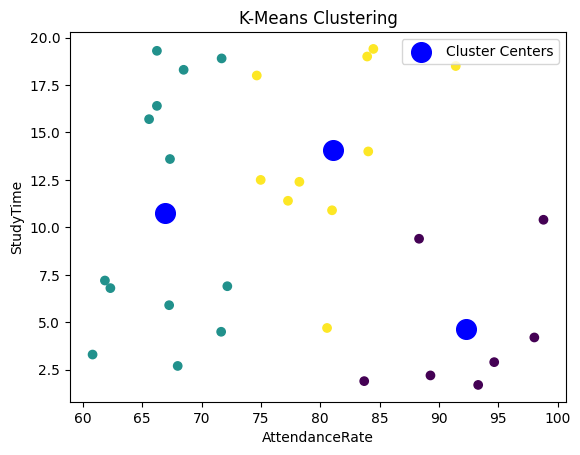

In [51]:
plt.scatter(df_for_clustering['AttendanceRate'], df_for_clustering['StudyTime'], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=200, c='blue', label='Cluster Centers')
plt.xlabel('AttendanceRate')
plt.ylabel('StudyTime')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [52]:
silhouette=silhouette_score(df_for_clustering,cluster_labels)
davies_bouldin=davies_bouldin_score(df_for_clustering,cluster_labels)

print('Silhouette Score:',silhouette)
print('Davies Bouldin Index:',davies_bouldin)

Silhouette Score: 0.391316629394718
Davies Bouldin Index: 0.8561312640490449
